<a href="https://colab.research.google.com/github/jem-thanmay/sparks01/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic : Data Science & Business Analytics Tasks**

***TASK 1*** **-THANMAY JEMBIGE**

Prediction using Supervised ML
(Level - Beginner) 

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hours/ day?

**REGRESSION**

What is Regression?

Regression model describes the relationship betweenvariables by fitting a line to the observed data. Linear Regression models use a straight line, while Logistic Regression models use a curved line. 
Regressio alows you to estimate how a dependent varible changes as the independent variables change.

**SIMPLE LINEAR REGRESSION**

Simple Linear Regression is a statistical method that allows us to summarize and study relationships between two continuous(quantitative) variables.


**SUPERVISED LEARNING**

Its the Machine Learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

**TASK:**

To predict the percentage of a student based on the number of study hours using supervised and simple linear regression.



***Importing the required libraries.***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
 # getting the data from the given dataset link

 data = pd.read_csv("/content/student_scores - student_scores.csv")
 print("The data has been loaded")
 print("The shape of the DataFrame is {}".format(data.shape))
 data.head()

The data has been loaded
The shape of the DataFrame is (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
#displaying the information using data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Checking the Relation between hours and score using scatterplot.

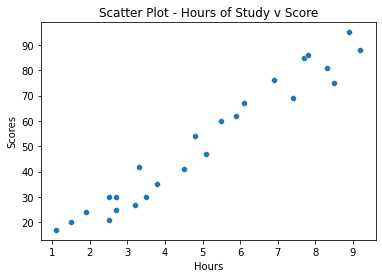

In [24]:
#scatterplot for hours vs score
sb.scatterplot(x=data.Hours, y=data.Scores, data=data).set_title("Scatter Plot - Hours of Study v Score")
plt.show()

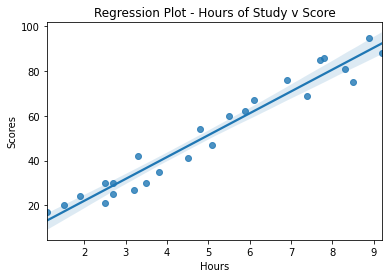

In [26]:
#regression plot for hours v score
sb.regplot(x=data.Hours, y=data.Scores, data=data).set_title("Regression Plot - Hours of Study v Score")
plt.show()

We use descibe() method for calculating some statistical data like percentile, mean, std of numeric values of series or dataframe.

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Finding Correlation
(data['Hours']).corr(data['Scores'])

0.9761906560220887

We can see that the correlation between the two columns is almost equal to what is described as highly correlated.

In [9]:
#To train the model

#considering hours as independent and score as dependent.

x = data['Hours'].to_numpy().reshape(-1,1)

y = data['Scores'].to_numpy().reshape(-1,1)

In [10]:
#use Sklearn to split the data into training and testing data.
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=45)

Data is thus divided into train and test t go further and develop the model using regression fir from scikit-learn.

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Training complete")
print("Intercept is ",reg.intercept_ , "Coefficient is ",reg.coef_)

Training complete
Intercept is  [1.32651148] Coefficient is  [[9.82716094]]


In [13]:
line = reg.coef_ *x + reg.intercept_

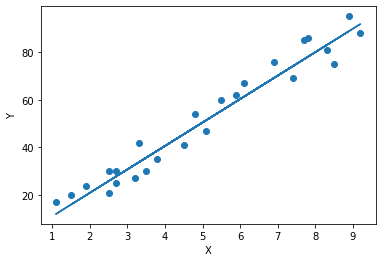

In [15]:
plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [16]:
#predicting the test data
yhat = reg.predict(x_test)
print("Predict",yhat)
print("Actual",y_test)

Predict [[25.89441384]
 [27.85984602]
 [33.75614259]
 [76.99565075]]
Actual [[30]
 [30]
 [42]
 [85]]


In [20]:
#predicting score if a student studies for 9.25 hours a day.
hours = np.array([9.25]).reshape(-1,1)
pred = reg.predict(hours)
print('No. of hours = {}' .format(hours))
print("Predicted Score = {}" .format(pred[0]))

No. of hours = [[9.25]]
Predicted Score = [92.22775021]


Efficiency of the student is **92.22%**  for number of hours equals **9.25**

~92%

In [22]:
#predicting score if a student studies for 11 hours a day.
hours = np.array([11]).reshape(-1,1)
pred = reg.predict(hours)
print('No. of hours = {}' .format(hours))
print("Predicted Score = {}" .format(pred[0]))

No. of hours = [[11]]
Predicted Score = [109.42528186]


Efficiency of the student is **109.4%** for number of hours equals **11** 

~109%

But this is ideal and this much efficiency is impractical.

In [23]:
#predicting score if a student studies for 8 hours a day.
hours = np.array([8]).reshape(-1,1)
pred = reg.predict(hours)
print('No. of hours = {}' .format(hours))
print("Predicted Score = {}" .format(pred[0]))

No. of hours = [[8]]
Predicted Score = [79.94379903]


Efficiency is 79.9% for number of hours equals 8

~80%

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("The RMS value is ",mean_squared_error(y_test,yhat))
print("The RMSE value is ",mean_squared_error(y_test,yhat,squared=False))
print("The R2 error is ",r2_score(y_test,yhat))

The RMS value is  38.36672218527943
The RMSE value is  6.194087679818508
The R2 error is  0.925019231102422


**CONCLUSION:**


*  ***We see that the number of hours of study is directly proportional to the scores.***
*   ***When the hours of study is more, the scores achieved is also higher***


*   ***Hence with respect to this analysis, we can conclude that the ideal amount of hours would be 11 but wouldn't be practical.***
*   ***Therefore the right amount of hours of study WRT this, is clearly 9.25 hours.***



